### Задание 1.2. Невосстанавливаемые системы с резервом ###

#### *1. Система состоит из двух элементов, основного и резервного. Резерв ненагруженный. При включении резервный элемент может отказать с вероятностью $p = 0.025$. Вычислить вероятность безотказной работы системы к моменту времени t, если интенсивности отказов элементов постоянны и равны $0.003~ч^{-1}$.* ####

При *ненагруженном* резервировании резервный элемент включается в работу (и может отказать) только после отказа основного.

Формула вероятности безотказной работы системы: 
$$R_{\Sigma}(t) = R_1(t) + \int_{0}^{t}R_2(t-u)dF_1(u)$$

Так как при включении резервный элемент может отказать с вероятностью $p = 0.025$, то формула примет вид: 
$$R_{\Sigma}(t) = R_1(t) + (1-p)\int_{0}^{t}R_2(t-u)dF_1(u)$$

Вероятность безотказной работы каждого элемента: $$R_1(t)=R_2(t)=e^{-\lambda t}$$

Функция распределения:
$$F_1(t) = 1-R_1(t)$$
$$dF_1(u)=\lambda e^{-\lambda u}du$$

Теперь это можно выразить в виде: 
$$R_{\Sigma}(t) = e^{-\lambda t} + (1-p)\int_{0}^{t}e^{-\lambda(t-u)}\lambda e^{-\lambda u}du$$

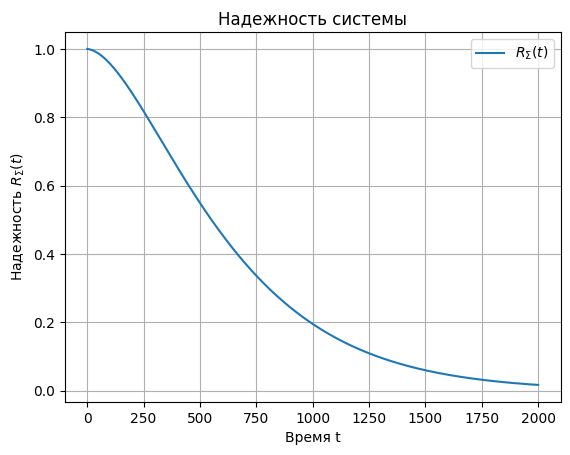

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from math import log

# Данные задачи
lambda_val = 0.003  # Интенсивность отказов
p = 0.025  # Вероятность отказа резервного элемента при включении

# Надежность R1(t) и R2(t)
def reliability(t):
    return np.exp(-lambda_val * t)

# Интеграл для RΣ(t)
def integrand(u, t):
    return lambda_val * np.exp(-lambda_val * (t))

def R_sigma(t):
    # Первая часть: надежность основного элемента
    R1 = reliability(t)
    
    # Вторая часть: интеграл с учетом плотности вероятности отказа первого элемента
    integral_part, _ = quad(lambda u: reliability(t - u) * lambda_val * np.exp(-lambda_val * u), 0, t)
    
    # Полная надежность
    return R1 + (1 - p) * integral_part

# Время для построения графика
time_points = np.linspace(0, 2000, 500)  # Время в часах
R_sigma_values = [R_sigma(t) for t in time_points]

# Построим график
plt.plot(time_points, R_sigma_values, label=r'$R_{\Sigma}(t)$')
plt.title("Надежность системы")
plt.xlabel("Время t")
plt.ylabel(r"Надежность $R_{\Sigma}(t)$")
plt.grid(True)
plt.legend()
plt.show()

#### *2. Система состоит из двух элементов, основного и резервного. Резерв нагруженный. Определить нормативный срок службы системы (в годах), считая время работы элементов экспоненциальным с параметром $\lambda = 0.000001346~ч^{−1}.$* ####

Так как резерв нагруженный, то функция распределения системы равна: $$ F_\Sigma(t) = (1-e^{-\lambda t})^2 $$

*Нормативный (назначенный) срок службы* – продолжительность работы, при достижении которой эксплуатация объекта должна быть прекращена независимо от его технического состояния.

Существуют различные подходы к вычислению нормативного срока службы невосстанавливаемого объекта. Чаще всего задают наибольшую допустимую вероятность отказа $\alpha$ или наименьшую допустимую вероятность безотказной работы $1 − \alpha$, обычно $\alpha = 0.01$ или $\alpha = 0.05$. Затем решают
одно из двух уравнений,
$$F(t)=\alpha$$
$$R(t)=1-\alpha$$

Мы возьмем $\alpha = 0.01$ и будем решать уравнение $(1-e^{-\lambda t})^2=\alpha$
$$t=-\frac{1}{\lambda}ln(1-\sqrt{\alpha})=-\frac{1}{0.000001346}ln(0.9)\approx 9 лет.$$

In [16]:
print("Ответ: " + str(-1/(0.000001346 * 365 * 24) * log(0.9)) + " лет.")

Ответ: 8.93570291628725 лет.


#### *3. Найти нормативный срок службы изделия с нормально распределенным временем работы до отказа, если $\mu = 40~лет$, а $\sigma = 12~лет$.* ####

Так как время распределено нормально, то функция распределения срока службы изделия: $$F(t)=\frac{1}{\sigma\sqrt{2\pi}}\int_{-\infty}^{t}e^{-\frac{(x-\mu)^2}{2\sigma^2}}dx$$


Так же, как и в прошлом задании, возьмем $\alpha = 0.01$ и будем решать уравнение
$$F(t)=\alpha$$
$$t=F^{-1}(\alpha)$$
 при параметрах:
- $\mu = 40~лет$
- $\sigma = 12~лет$
- $F(t) = 0.01$


Решать будем численно:

In [9]:
from scipy.stats import norm

# Данные
mu = 40  # Среднее значение
sigma = 12  # Стандартное отклонение
F_t = 0.01  # Значение вероятности

t_value = norm.ppf(F_t, loc=mu, scale=sigma)
print("Ответ: " + str(t_value) + " лет.")

Ответ: 12.083825511509911 лет.


#### *4. Для системы, состоящей из двух стареющих основных элементов, предлагаются два варианта резервирования: ненагруженное (два запасных элемента заменяют основные при отказе одного из них) и скользящее (один запасной элемент заменяет отказавший основной). Какой из вариантов надежнее? Какой вид резервирования предложили бы вы, если бы в вашем распоряжении были два запасных элемента?* ####

*<u>Ненагруженное резервирование: </u>*

<img src="images/1.jpg" alt="drawing" width="600" align="left" style="padding-right:10px">

Блок А состоит из 2-ух последовательно соединенных элементов $\Rightarrow R_A(t) = \mathbb{P}\{\xi_1>t,~\xi_2>t\} = \mathbb{P}\{\xi_1>t\} \cdot \mathbb{P}\{\xi_2>t\} = R_1(t) \cdot R_2(t) = (R(t))^2$

Если рассмотреть систему, где блоки А и В являются элементами, то время работы системы - это сумма времен работы элементов: $ \xi_\Sigma = \xi_A+\xi_B \Rightarrow$
$$ R_{\Sigma_H}(t) = \mathbb{P}\{\xi_\Sigma > t\} = R_A(t) + \int\limits_{0}^{t}R_B(t-u)dF_A(u) =$$
$$ R^2(t) + \int\limits_{0}^{t}R^2(t-u)d(1-R^2(u)) = R^2(t) - 2\int\limits_{0}^{t}R(u)R^2(t-u)dR(u) $$

*<u>Скользящее резервирование: </u>*

<img src="images/2.jpg" alt="drawing" width="400">
<img src="images/3.jpg" alt="drawing" width="400" height="153">
<img src="images/4.jpg" alt="drawing" width="400" height="153">


Система работала до времени $t$:
1) Основные элементы работали до времени $t$.
2) Один из основных элементов мог отказать в момент времени $u \le t$, после чего резервный элемент вступил в работу и до момента времени $t$ не отказал.

Вероятность первого события: $\mathbb{P}\{\xi_1>t,~\xi_2>t\} = R^2(t)$

Второе событие вновь разделим на непересекающиеся части: предположим, отказал 1-ый основной элемент на интервале $[u,~u+du]$, где $u\in[0,~t]$, тогда 2-ой основной элемент проработал до времени $t$. Вероятность этого события: $R_2(t)f_1(u)du = R_2(t)dF_1(u) = R(t)dF(u)$. Резервный элемент включился в работу в момент $u$ и до $t$ не отказал, вероятность этого события: $R_3(t-u) = R(t-u)$. Так как отказы независимы, то верроятность того, что 1-ый основной элемент отказал на $[u,~u+du]$, где $u\in[0,~t]$, 2-ой проработал до времени $t$ и не отказал, а резервный проработал время $t-u$ и не отказал - это произведение соответсвующих вероятностей: $R(t)R(t-u)dF(u)$. Суммирование этих вероятностей при изменении параметра $u$ от 0 до $t$ дает нам интеграл: $\int\limits_{0}^{t}R(t)R(t-u)dF(u)$. Аналогично, мы получим такой же интеграл, когда откажет 2-ой элемент, а не 1-ый. В итоге, получаем:
$$R_{\Sigma_C}(t) = R^2(t) + 2\int\limits_{0}^{t}R(t)R(t-u)dF(u)$$

*<u>Сравним, что надежнее:</u>*

$R_{\Sigma_H}(t)-R_{\Sigma_C}(t) = R^2(t) - 2\int\limits_{0}^{t}R(u)R^2(t-u)dR(u) - R^2(t) - 2\int\limits_{0}^{t}R(t)R(t-u)d\underset{1-R(u)}{\underbrace{F(u)}} = 2\int\limits_{0}^{t}R(u)R^2(t-u)dR(u) + 2R(t)\int\limits_{0}^{t}R(t-u)dR(u) = 2\int\limits_{0}^{t}\left[R(t) - R(u)R(t-u)\right]R(t-u)\underset{<~0}{\underbrace{dR(u)}}  $

Если данный интеграл имеет положительный знак, то ненагруженное резервирование надежнее. Найдем, какой знак имеет $R(t) - R(u)R(t-u)$:
$$R(t)~~~~?~~~~R(u)R(t-u)$$
$$ln R(t)~~~~?~~~~ln R(u) + ln R(t-u)$$
$$(lnR(t))' = \frac{R'(t)}{R(t)} = -\lambda(t)$$
$$(lnR(t-u))' = \frac{R'(t-u)}{R(t-u)} = -\lambda(t-u)$$
$$\lambda(t)>\lambda(t-u) \Rightarrow -\lambda(t)<-\lambda(t-u)$$

При $t=0$ левая и правая чати равны, левая часть убывает быстрее $\Rightarrow$ получаем, $R(t) - R(u)R(t-u) < 0 \Rightarrow $
$$R_{\Sigma_H}(t)-R_{\Sigma_C}(t) > 0 \Rightarrow R_{\Sigma_H}(t)>R_{\Sigma_C}(t)$$

**Вывод:** ненагруженный резерв надежнее.

#### *5. Дублированная система без восстановления состоит из одного рабочего и одного резервного элемента, который находится в облегченном резерве. $F(t|t_0)$ – условная функция распределения времени жизни элемента в рабочем режиме при условии, что ранее он работал в резерве время $t_0$ и не отказал, а затем был переведен в рабочее состояние. $G(t)$ – функция распределения времени работы в облегченном режиме. Найти вероятность безотказной работы системы за время $t$.* ####

<img src="images/5.jpg" alt="drawing" width="240" align="left" style="padding-right:30px">

Система работала до времени $t$:
1) Основной элемент работал до времени $t$
2) Основной элемент отказал в момент времени $u \le t$, после чего резервный вступил в работу и до $t$ не отказал.

Вероятность первого события - вероятность безотказной работы основного элемента: $R_1(t) = 1-F(t|0)$

Второе событие надо разделить на непересекающиеся части: основной элемент отказал на интервале $[u,~u+du]$, где $u\in[0,~t]$, вероятность этого события $dF(u|0)$, резервный включился в работу в момент $u$ и до $t$ не отказал, работал в течение времени $t-u$. Вероятность этого события - вероятность безотказной работы резервного элемента при условии, что он проработал в резерве время $u$: $1-(1-G(u))F(t-u|u)$. Вероятность того, что и основной элемент отказал на интервале $[u,~u+du]$ и резервный проработал без отказа до момента $t$, это произведение соответсвующих вероятностей. Суммирование этих вероятностей при изменении параметра $u$ от 0 до $t$ даст нам интеграл: $\int\limits_{0}^{t}(1-G(u))(1-F(t-u|u))dF(u|0)$. Тогда:

$$R_{\Sigma}(t) = \mathbb{P}\{\xi_{\Sigma}>t\} = 1-F(t|0) + \int\limits_{0}^{t}(1-G(u))(1-F(t-u|u))dF(u|0)$$

#### *6. Предложите модель закона распределения $F(t|t_0)$ (конкретную формулу) для стареющего элемента.* ####

$$F(t|t_0) = \frac{\mathbb{P\{\xi \le t\}}}{1-\mathbb{P\{\xi \le t_0\}}} = \frac{F(t)}{1-F(t_0)}$$
$$ F(t) = 1-e^{-\lambda t^{\alpha}}$$ 
$$F(t|t_0) = \frac{1-e^{-\lambda t^{\alpha}}}{e^{-\lambda t^{\alpha}_0}} $$